# Introduction:


The proposal is important in today's world as accurate COVID-19 prediction can significantly improve medical treatment and resource allocation. By effectively screening individuals, healthcare systems can prioritize testing and treatment, reducing the burden on hospitals and healthcare providers. Additionally, accurate predictions can aid in early detection and isolation of infected individuals, thereby limiting the spread of the virus.

Predictive models based on machine learning  algorithms can help medical professionals make data-driven decisions, enabling quicker responses to potential outbreaks and resource planning. Moreover, the proposed method's utility is not limited to COVID-19; it can be adapted to predict outcomes for other diseases and outbreaks, enhancing preparedness and response strategies for future health crises.


# Covid-19:- IMPROVING MEDICAL TREATMENT::

The implementation of an effective screening tool based on our machine learning model can have a profound impact on the medical field. It can significantly reduce the burden on healthcare systems by streamlining the diagnostic process, particularly in areas with limited testing capacities. By efficiently identifying COVID-19 positive individuals, healthcare resources can be optimized, ensuring that critical cases receive immediate attention while preventing the unnecessary utilization of resources for low-risk cases. This targeted allocation of resources can help in managing the influx of patients, improving overall healthcare delivery, and potentially saving lives.

# Future Applications and Knowledge Gap:

Beyond its immediate application in COVID-19 prediction, our proposed Machine learning model can serve as a valuable framework for predicting other diseases based on symptoms. The knowledge gained from developing this model, such as feature selection techniques and algorithmic approaches, can be applied to future disease prediction efforts. This has the potential to fill knowledge gaps in various healthcare domains, allowing for faster and more accurate diagnosis of diseases beyond COVID-19. The ability to predict diseases accurately has far-reaching implications for personalized medicine, public health planning, and the development of targeted treatment strategies, ultimately leading to improved healthcare outcomes for individuals and communities alike.

#Initial Hypothesis

Based on the dataset provided, we can form the following initial hypotheses:

Hypothesis 1: Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test positive for the virus.

This hypothesis suggests that individuals who have had close contact with confirmed COVID-19 positive patients are at a higher risk of being infected themselves. By examining the variable "Known_contact" in the dataset, we can investigate whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

Hypothesis 2: Symptoms such as shortness of breath, fever, and cough are important factors in predicting COVID-19 positive cases.

This hypothesis proposes that symptoms such as shortness of breath, fever, and cough are key indicators in identifying COVID-19 positive cases. By analyzing the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we can explore the relationship between these symptoms and the likelihood of a person being COVID-19 positive or negative.

It is important to note that these are initial hypotheses based on the provided dataset, and further anal

ysis and modeling will be required to validate these assumptions and uncover additional insights related to COVID-19 prediction.


#Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
CoronaTested = pd.read_csv('/content/drive/MyDrive/Datasets/corona_tested.csv')

<ipython-input-4-b48f65d3bf0c>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  CoronaTested = pd.read_csv('/content/drive/MyDrive/Datasets/corona_tested.csv')


In [5]:
CoronaTested.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
CoronaTested

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


Insights:

There are records with value as None in Age and Sex column.

Also, we can see some data are in UPPERCASE and some are in LOWERCASE.

In [7]:
CoronaTested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [8]:
print(CoronaTested.shape)
print("\n")
print(CoronaTested.dtypes)

(278848, 11)


Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object


Insights:

1. All the columns are of Object Data type except Ind_ID which is of integer type.

2. There is no NULL values in any columns.



In [9]:
CoronaTested.describe(include = "all")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Data Cleaning

In [10]:
CoronaTested.duplicated().sum()

0

In [11]:
CoronaTested.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [12]:
CoronaTested.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

## Dropping unwanted Columns

'Ind_ID' and 'Test_date' which we don't need in our analysis and in model building.
As per our business requirement , we have to divide the dataset in training set and Testing set based on Test_date , so we will keep this column now and drop it before model building and dividng dataset into Training set and Test set.
Corona is our Outcome variable.
For now , we will drop 'Ind_ID' column.

In [13]:
CoronaTested = CoronaTested.drop(['Ind_ID'],axis = 1)

In [14]:
CoronaTested.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [15]:
CoronaTested.nunique()

Test_date              51
Cough_symptoms          5
Fever                   5
Sore_throat             5
Shortness_of_breath     5
Headache                5
Corona                  3
Age_60_above            3
Sex                     3
Known_contact           3
dtype: int64

# viewing the unique values in each variables.

In [16]:
pd.Series({c:CoronaTested[c].unique() for c in CoronaTested})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona                                       [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

As mentioned above, there is a repitation of data in Uppercase and Lowercase in all the symptoms columns. Let's check this out in number of values.

In [17]:
for i in CoronaTested.columns:
	print("---%s--" %i)
	print(CoronaTested[i].value_counts())

---Test_date--
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03

# **Insights:**

1. In the columns Cough_symptoms , Fever , Sore_throat , Shortness_of_breath and Headache. We have values like TRUE ,True , False , FALSE. So , we need to address these as we have to rename and make it to True and False only.

2. We also have another value of "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to address those also.

3. As these values are null values , but not recognised as Null value.
Let's clean each column separately

In [18]:
CoronaTested['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [19]:
CoronaTested['Cough_symptoms'] = CoronaTested['Cough_symptoms'].apply(lambda x : False if x == 'FALSE' else x)
CoronaTested['Cough_symptoms'] = CoronaTested['Cough_symptoms'].apply(lambda x : True if x == 'TRUE' else x)
CoronaTested['Cough_symptoms'].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

# Insights:

1. We have value as "None" in 252 records , we need to impute these values or drop it. As this contain categorical values , we can't use mean imputation or KNN imputation. Imputing it with Mode(which is False) might make our data bias.

# Therefore droping these records is the best option.

2. Before doing that I want to check relation between "Cough_symptoms" column and "Corona" column. We also have value as "Other" in Corona column. So , let's check if there is a relation between "other"value of corona column and in "None" value of Cough_symptoms and "Fever" Column.

In [20]:
CoronaTested[CoronaTested["Cough_symptoms"] == "None"]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
68,11-03-2020,None,FALSE,TRUE,FALSE,FALSE,positive,None,None,Abroad
281,11-03-2020,None,None,FALSE,FALSE,FALSE,positive,None,None,Abroad
577,12-03-2020,None,None,None,None,None,positive,None,None,Other
2664,15-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
4442,16-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
...,...,...,...,...,...,...,...,...,...,...
95936,04-04-2020,None,None,False,False,False,negative,No,male,Other
95937,04-04-2020,None,None,False,False,False,negative,No,female,Other
95938,04-04-2020,None,None,False,False,False,negative,Yes,male,Other
95939,04-04-2020,None,None,False,False,False,negative,No,female,Other


 I don't see any relation between them. So, I will be dropping the rows with None value in cough symptoms.

 # Dropping rows with None value in column "Cough_Symptoms"


In [21]:
CoronaTested = CoronaTested[CoronaTested.Cough_symptoms != "None"]

In [22]:
CoronaTested['Cough_symptoms'].unique()

array([True, False], dtype=object)

* The column COUGH_SYMPTOMS is cleaned.

# Fever Column

In [23]:
CoronaTested['Fever'].value_counts()

False    137774
FALSE    119069
TRUE      11749
True      10002
None          2
Name: Fever, dtype: int64

In [24]:
CoronaTested['Fever'] = CoronaTested['Fever'].apply(lambda x : False if x == 'FALSE' else x)
CoronaTested['Fever'] = CoronaTested['Fever'].apply(lambda x : True if x == 'TRUE' else x)
CoronaTested['Fever'].value_counts()

<ipython-input-24-d1828ff0350c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoronaTested['Fever'] = CoronaTested['Fever'].apply(lambda x : False if x == 'FALSE' else x)
<ipython-input-24-d1828ff0350c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoronaTested['Fever'] = CoronaTested['Fever'].apply(lambda x : True if x == 'TRUE' else x)


False    256843
True      21751
None          2
Name: Fever, dtype: int64

* There is only 2 None value rows in Fever Column, we can drop this rows too, as this will not make much of a difference in the result.

# Dropping rows with None value in column "Fever"


In [25]:
CoronaTested = CoronaTested[CoronaTested.Fever != "None"]

In [26]:
CoronaTested['Fever'].unique()

array([False, True], dtype=object)

# Sore Throat Column

In [27]:
CoronaTested['Sore_throat'].value_counts()

False    212357
FALSE     64315
TRUE       1194
True        728
Name: Sore_throat, dtype: int64

In [28]:
CoronaTested['Sore_throat'] = CoronaTested['Sore_throat'].apply(lambda x : False if x == 'FALSE' else x)
CoronaTested['Sore_throat'] = CoronaTested['Sore_throat'].apply(lambda x : True if x == 'TRUE' else x)
CoronaTested['Sore_throat'].value_counts()

<ipython-input-28-55b1e3b376ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoronaTested['Sore_throat'] = CoronaTested['Sore_throat'].apply(lambda x : False if x == 'FALSE' else x)
<ipython-input-28-55b1e3b376ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoronaTested['Sore_throat'] = CoronaTested['Sore_throat'].apply(lambda x : True if x == 'TRUE' else x)


False    276672
True       1922
Name: Sore_throat, dtype: int64

# Shortness of Breath Column

In [29]:
CoronaTested['Shortness_of_breath'].value_counts()

False    212615
FALSE     64405
TRUE       1104
True        470
Name: Shortness_of_breath, dtype: int64

In [30]:
CoronaTested['Shortness_of_breath'] = CoronaTested['Shortness_of_breath'].apply(lambda x : False if x == 'FALSE' else x)
CoronaTested['Shortness_of_breath'] = CoronaTested['Shortness_of_breath'].apply(lambda x : True if x == 'TRUE' else x)
CoronaTested['Shortness_of_breath'].value_counts()

False    277020
True       1574
Name: Shortness_of_breath, dtype: int64

# Headache Column

In [31]:
CoronaTested['Headache'].value_counts()

False    212100
FALSE     64086
TRUE       1423
True        985
Name: Headache, dtype: int64

In [32]:
CoronaTested['Headache'] = CoronaTested['Headache'].apply(lambda x : False if x == 'FALSE' else x)
CoronaTested['Headache'] = CoronaTested['Headache'].apply(lambda x : True if x == 'TRUE' else x)
CoronaTested['Headache'].value_counts()

False    276186
True       2408
Name: Headache, dtype: int64

## Age_60_Above Column

1.  We have lot of values in this column as "None" values.
2.  The reason behind this may be patient is not comfortable in revealing his/her age.
3.  We can rename it as "Unknown"






In [33]:
CoronaTested["Age_60_above"].value_counts()

None    127315
No      125504
Yes      25775
Name: Age_60_above, dtype: int64

In [34]:
CoronaTested['Age_60_above'] = CoronaTested['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)
CoronaTested['Age_60_above'].value_counts()

Unknown    127315
No         125504
Yes         25775
Name: Age_60_above, dtype: int64

# Sex Coloumn

1. There are lots of values in whose sex is unknown and the reason may be similar to Age column
2.  We can rename it as Unknown



In [35]:
CoronaTested['Sex'].value_counts()

female    130030
male      129012
None       19552
Name: Sex, dtype: int64

#renaming "None" value to "Unknown"


In [36]:
CoronaTested['Sex'] = CoronaTested['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)
CoronaTested['Sex'].value_counts()

female     130030
male       129012
Unknown     19552
Name: Sex, dtype: int64

# Known Contact Column

In [37]:
CoronaTested['Known_contact'].value_counts()

Other                     242504
Abroad                     25462
Contact with confirmed     10628
Name: Known_contact, dtype: int64

# Corona Column

In [38]:
CoronaTested['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

# Insights:

1.   We have three values in our Outcome Variable column and they are "negative", "positive" and "other"
2.  As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.

3.  As the values with "other" is less than 1% of total records and we don't need to train our model for "other" value
4.  We can Dropping other values in corona column.


In [39]:
CoronaTested = CoronaTested[CoronaTested.Corona!= "other"]
CoronaTested


,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


In [40]:
CoronaTested['Corona'].value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

#   After Data Cleaning, we are now left with 2,74,702 Records, in which 2,60,008 patients are "corona negative" and 14,694 are "corona positive" .



# **Exploratory Data Analysis (EDA)**

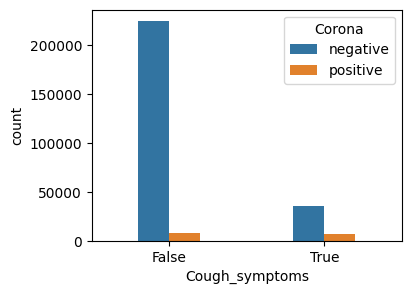

In [41]:
plt.figure(figsize=(4,3))
sns.countplot(x='Cough_symptoms',hue='Corona',data=CoronaTested,width=0.4)
plt.show()


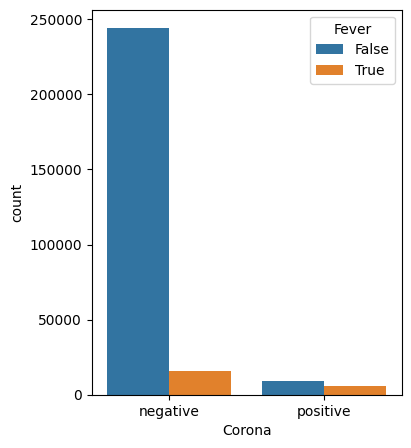

In [42]:
plt.figure(figsize=(4,5))
sns.countplot(CoronaTested, x = CoronaTested['Corona'],hue='Fever')
sns.set(style='whitegrid')

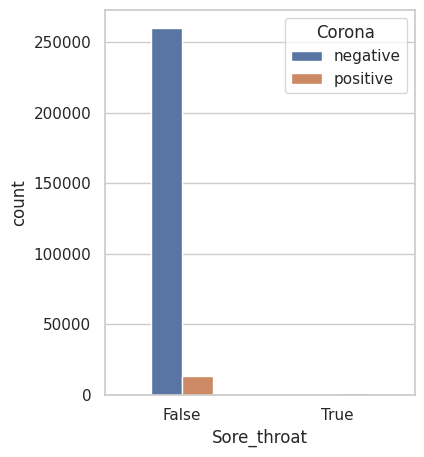

In [43]:
plt.figure(figsize=(4,5))
sns.countplot(x='Sore_throat',hue='Corona',data=CoronaTested,width=0.4)
plt.show()

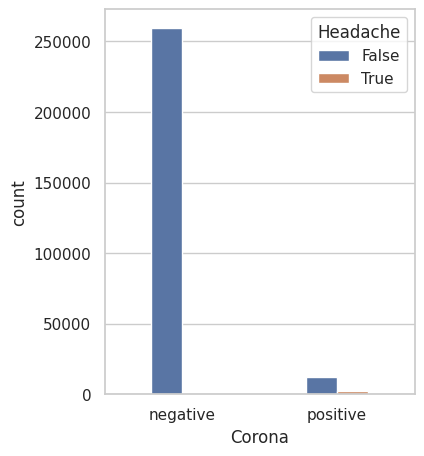

In [44]:
plt.figure(figsize=(4,5))
sns.countplot(x='Corona',hue='Headache',data=CoronaTested,width=0.4)
plt.show()

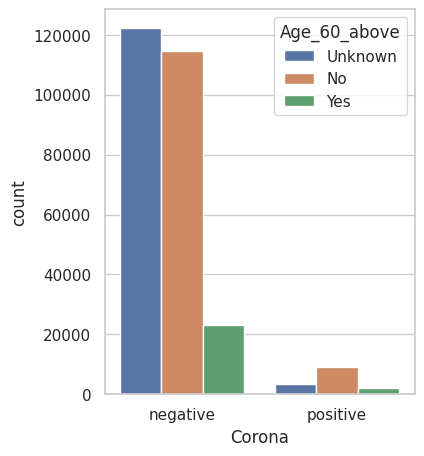

In [45]:
plt.figure(figsize=(4,5))
sns.countplot(CoronaTested, x = CoronaTested['Corona'],hue='Age_60_above')
sns.set(style='whitegrid')

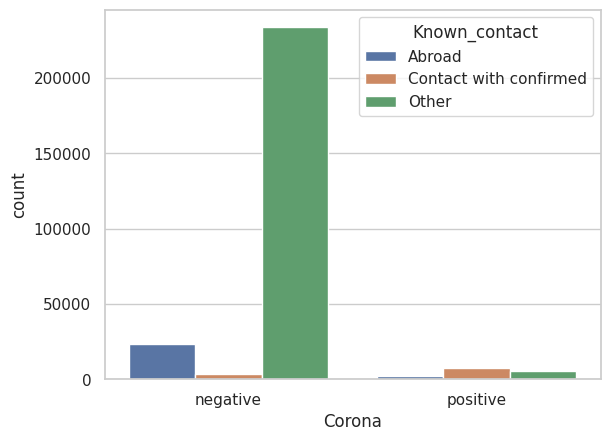

In [46]:
sns.countplot(CoronaTested, x = CoronaTested['Corona'],hue='Known_contact')
sns.set(style='whitegrid')

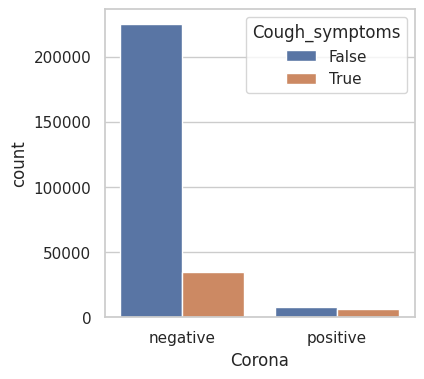

In [47]:
plt.figure(figsize=(4,4))
sns.countplot(CoronaTested, x = CoronaTested['Corona'],hue='Cough_symptoms')
sns.set(style='whitegrid')

# Exact Corona Positive to Corona negative ratio


In [48]:
CoronaTested[CoronaTested.Corona=='negative'].shape[0]/CoronaTested[CoronaTested.Corona=='positive'].shape[0]

17.694841431876956

# This shows that 1 in every 17-18 patients is corona positive.

In [49]:
print(CoronaTested['Corona'].value_counts())
print('\n')
print(CoronaTested['Corona'].value_counts(normalize=True))

negative    260008
positive     14694
Name: Corona, dtype: int64


negative    0.946509
positive    0.053491
Name: Corona, dtype: float64


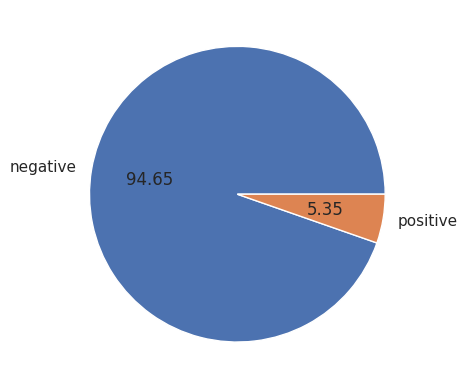

In [50]:
plt.pie(CoronaTested['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()

# Data is highly Imbalanced as 94.65% are covid negative and only 5.35% are covid positive.

# Encoding

In [51]:
CoronaTested['Corona'] = CoronaTested['Corona'].map({'negative' : 0 , 'positive' : 1})

* creating new DataFrame with Corona value


In [52]:
df_positive = CoronaTested[CoronaTested['Corona'] == 1]
df_negative = CoronaTested[CoronaTested['Corona'] == 0]

In [53]:
CoronaTested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            274702 non-null  object
 1   Cough_symptoms       274702 non-null  object
 2   Fever                274702 non-null  object
 3   Sore_throat          274702 non-null  bool  
 4   Shortness_of_breath  274702 non-null  bool  
 5   Headache             274702 non-null  bool  
 6   Corona               274702 non-null  int64 
 7   Age_60_above         274702 non-null  object
 8   Sex                  274702 non-null  object
 9   Known_contact        274702 non-null  object
dtypes: bool(3), int64(1), object(6)
memory usage: 17.6+ MB


* Getting All The Independent variables Into One And Storing It In a list.


In [54]:
obj_plot = list(CoronaTested.columns[(CoronaTested.dtypes=="object") | (CoronaTested.dtypes=="bool")])
obj_plot

['Test_date',
 'Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

In [55]:
CoronaTested.corr()

<ipython-input-55-fe516404fb84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CoronaTested.corr()


,Sore_throat,Shortness_of_breath,Headache,Corona
Sore_throat,1.000000,0.195181,0.323343,0.278462
Shortness_of_breath,0.195181,1.000000,0.202082,0.233417
Headache,0.323343,0.202082,1.000000,0.367324
Corona,0.278462,0.233417,0.367324,1.000000


<ipython-input-56-b1f23752766a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_CoronaTested=CoronaTested.corr()


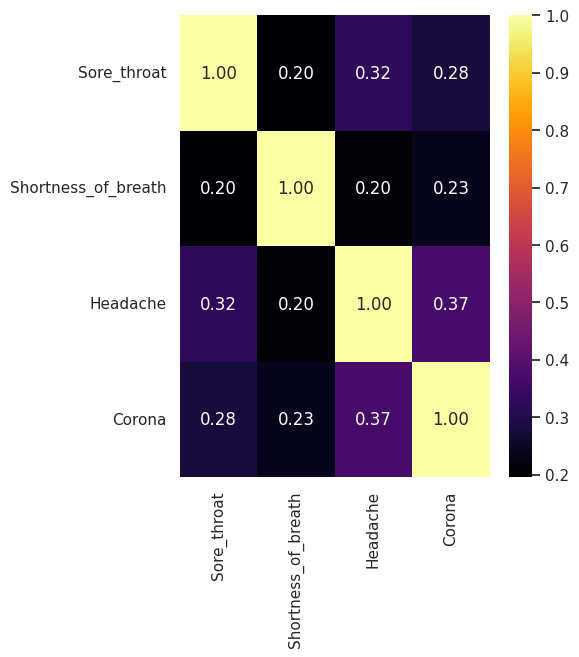

In [56]:
corr_CoronaTested=CoronaTested.corr()

plt.figure(figsize = (5,6))
sns.heatmap(data = corr_CoronaTested, annot = True,cmap = "inferno", cbar = True, fmt='.2f')
plt.show()

# **conculsion:**
1. the number of people who got Corona test report as negitve is higher than the number of people who got Corona test report as positve.
2. the sum of positively reported male people number is higher than female
3. The number of negtively reported people who got fever is lesser than the number of negtively reported people who did not get fever. And the people who got fever or not are postively reported for Corona_Viras is almost equal in number. So that, fever is not considerable symptom actually in case of Corona_Viras.
4. the number of positvely reported people who got sore_troat is very less as compared to  the number of positvely reported people who did not get sore_troat and the number of negtively reported people who did not sore_troat. So that, sore_troat is also not considerable symptom for Corona_Viras.
5. the reporting of symptom headache is similar to sore_troat.
6. the reporting of Age_60_above is similar to sore_troat.
7. the one known_contact who got confirmed for positively reported people is heigher than other, so that feture known_contract with comformed persons is considerable.
8. the number of postively reported people who has symptom cough or not is alomost equal and other hand the number of  negtively reported people who got cough is heigher than the number of positively reported people.

-----------------------------------------------------------------------
Therefore, the positevly reported people with smytoms are less compared to the negtively reported people with symptoms.

these symptoms are not acceptable to predict Corona_Viras except the ## Cough symptom @@


# **Feature Engineering**

It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

* Feature Creation, Feature Scaling,Feature Extraction and feature selection.

In [57]:
CoronaTested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,1,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,0,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,0,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,0,Unknown,male,Other


In [58]:
CoronaTested.to_csv("cleaned_data.csv")

In [59]:
CoronaTested.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed


In [60]:
CoronaTested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,1,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,0,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,0,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,0,Unknown,male,Other


In [61]:
#fetching unique values of features

print(CoronaTested['Cough_symptoms'].unique())
print(CoronaTested['Fever'].unique())
print(CoronaTested['Sore_throat'].unique())
print(CoronaTested['Shortness_of_breath'].unique())
print(CoronaTested['Headache'].unique())
print(CoronaTested['Age_60_above'].unique())
print(CoronaTested['Sex'].unique())
print(CoronaTested['Known_contact'].unique())

[True False]
[False True]
[ True False]
[False  True]
[False  True]
['Unknown' 'No' 'Yes']
['Unknown' 'male' 'female']
['Abroad' 'Contact with confirmed' 'Other']


In [62]:
# First, we need to import labelencoder from sklearn

from sklearn.preprocessing import LabelEncoder

# Perfoming LabelEncoding
CoronaTested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']] =CoronaTested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']].apply(LabelEncoder().fit_transform)

In [63]:
# Removing the index column
CoronaTested.reset_index(drop=True, inplace=True)

In [64]:
CoronaTested = CoronaTested.drop(['Test_date'],axis=1)

In [65]:
CoronaTested

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
274697,0,0,0,0,0,1,1,2,2
274698,0,0,0,0,0,0,1,1,2
274699,0,0,0,0,0,0,1,2,2
274700,0,0,0,0,0,0,1,2,2


In [66]:
CoronaTested.to_csv("cleaned.csv")

In [67]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = CoronaTested.drop('Corona', axis=1)
y = CoronaTested['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#Training Set

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Test Set

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (219761, 8)
y_train shape: (219761,)
X_test shape: (54941, 8)
y_test shape: (54941,)


# Feature Scaling

In [69]:
# performing transformation of data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.42241168, -0.29068039, -0.08309512, ...,  0.55587738,
         0.98652816,  0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, ...,  0.55587738,
         0.98652816,  0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, ...,  0.55587738,
        -0.64194616,  0.37049618],
       ...,
       [-0.42241168, -0.29068039, -0.08309512, ..., -0.99601318,
         0.98652816,  0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, ..., -0.99601318,
         0.98652816,  0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, ..., -0.99601318,
         0.98652816,  0.37049618]])

In [70]:
X_test=sc.transform(X_test)
X_test

array([[-0.42241168, -0.29068039, -0.08309512, ...,  0.55587738,
        -0.64194616,  0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, ..., -0.99601318,
         0.98652816,  0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, ...,  0.55587738,
        -0.64194616,  0.37049618],
       ...,
       [ 2.3673588 , -0.29068039, -0.08309512, ..., -0.99601318,
        -2.27042048, -2.98837066],
       [-0.42241168,  3.44020459, -0.08309512, ..., -0.99601318,
        -0.64194616, -1.30893724],
       [-0.42241168, -0.29068039, -0.08309512, ...,  0.55587738,
        -0.64194616,  0.37049618]])

## Algorithm's

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Create a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train and evaluate all the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Model: Random Forest
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Model: Logistic Regression
Accuracy: 0.96
Precision: 0.95
Recall: 0.96
F1 Score: 0.95

Model: SVM
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Model: K-Nearest Neighbors
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Model: Naive Bayes
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93

Model: Decision Tree
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


## Examining Multicollinearity using VIF

Multicollinearity can be defined as the presence of high correlations between two or more independent variables (predictors). This is essentially a phenomenon in which independent variables are correlated with one another. It measures the degree to which two variables are related based on their correlation.

In [72]:
# First Import variance_inflation_factor (VIF) from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

CoronaTested = CoronaTested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]

# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = CoronaTested.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(CoronaTested.values, i)
                          for i in range(len(CoronaTested.columns))]

print(vif_data)

               feature       VIF
0       Cough_symptoms  1.553829
1                Fever  1.400507
2          Sore_throat  1.154474
3  Shortness_of_breath  1.080408
4             Headache  1.172620
5         Age_60_above  1.955016
6                  Sex  4.800908
7        Known_contact  4.805530


# Insights

1.   The default VIF cutoff value is 5, only variables with a VIF less than 5 will be included in the model.
2.  VIF <= 5 is considered as considerable collinearity
3.  All the VIF value is less than 5. We can go with all the features


In [75]:
import sqlite3

In [76]:
# Connect to the MySQL database
connection = sqlite3.connect(host='localhost',
                             user='username',
                             password='password',
                             db='database_name')

# Create a cursor object
cursor = connection.cursor()

# Find the number of corona patients who faced shortness of breath
query1 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Shortness of breath` = 1 AND `Corona report` = 'positive'"
cursor.execute(query1)
num_patients = cursor.fetchone()[0]
print("Number of corona patients who faced shortness of breath:", num_patients)

# Find the number of negative corona patients who have fever and sore throat
query2 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Fever` = 1 AND `Sore throat` = 1 AND `Corona report` = 'negative'"
cursor.execute(query2)
num_negative_patients = cursor.fetchone()[0]
print("Number of negative corona patients who have fever and sore throat:", num_negative_patients)

# Group the data by month and rank the number of positive cases
query3 = "SELECT MONTH(`Test date`) AS `Month`, COUNT(*) AS `Number of positive cases` FROM corona_tested_006 WHERE `Corona report` = 'positive' GROUP BY MONTH(`Test date`) ORDER BY COUNT(*) DESC"
cursor.execute(query3)
positive_cases_by_month = cursor.fetchall()
for row in positive_cases_by_month:
    print("Month:", row[0], "Number of positive cases:", row[1])

# Find the female negative corona patients who faced cough and headache
query4 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Sex` = 'female' AND `Cough` = 1 AND `Headache` = 1 AND `Corona report` = 'negative'"
cursor.execute(query4)
num_female_negative_patients = cursor.fetchone()[0]
print("Number of female negative corona patients who faced cough and headache:", num_female_negative_patients)

# How many elderly corona patients have faced breathing problems?
query5 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Age ≥60 above years` = 1 AND `Shortness of breath` = 1 AND `Corona report` = 'positive'"
cursor.execute(query5)
num_elderly_patients = cursor.fetchone()[0]
print("Number of elderly corona patients who faced breathing problems:", num_elderly_patients)

# Which three symptoms were more common among COVID positive patients?
query6 = "SELECT `Cough`, `Fever`, `Sore throat`, `Shortness of breath`, `Headache` FROM corona_tested_006 WHERE `Corona report` = 'positive'"
cursor.execute(query6)
positive_symptoms = cursor.fetchall()[0]
sorted_symptoms = sorted(positive_symptoms, reverse=True)
most_common_symptoms = sorted_symptoms[:3]
print("Three most common symptoms among COVID positive patients:", most_common_symptoms)

# Which symptom was less common among COVID negative people?
query7 = "SELECT `Cough`, `Fever`, `Sore throat`, `Shortness of breath`, `Headache` FROM corona_tested_006 WHERE `Corona report` = 'negative'"
cursor.execute(query7)
negative_symptoms = cursor.fetchall()[0]
sorted_symptoms = sorted(negative_symptoms)
least_common_symptom = sorted_symptoms[0]
print("Least common symptom among COVID negative people:", least_common_symptom)

# What are the most common symptoms among COVID positive males whose known contact was abroad?
query8 = "SELECT `Cough`, `Fever`, `Sore throat`, `Shortness of breath`, `Headache` FROM corona_tested_006 WHERE `Corona report` = 'positive' AND `Sex` = 'male' AND `Known contact with an individual confirmed to have COVID-19` = 1"
cursor.execute(query8)
male_abroad_symptoms = cursor.fetchall()[0]
sorted_symptoms = sorted(male_abroad_symptoms, reverse=True)
most_common_symptoms = sorted_symptoms[:3]
print("Three most common symptoms among COVID positive males whose known contact was abroad:", most_common_symptoms)

# Close the cursor and connection
cursor.close()
connection.close()


TypeError: ignored